<a href="https://colab.research.google.com/github/Kavya-1708/Revenue_prediction/blob/main/revenue_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [33]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Read csv file
df = pd.read_csv('revenue_prediction.csv')

In [35]:
# display first few rows
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [36]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [37]:
df.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


In [38]:
# count null values
df.isnull().sum()

,0
Id,0
Name,0
Franchise,0
Category,0
City,0
No_Of_Item,0
Order_Placed,0
Revenue,0


In [39]:
# find duplicates
df.duplicated().sum()

np.int64(0)

# Visualizations

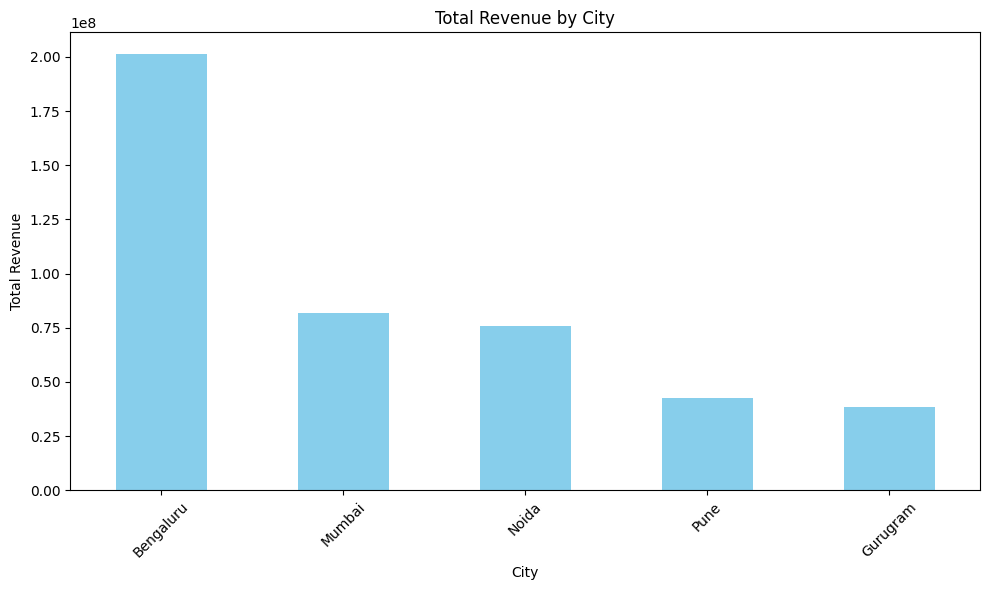

In [40]:
# Bar Chart – Total Revenue by City
plt.figure(figsize=(10, 6))
city_revenue = df.groupby("City")["Revenue"].sum().sort_values(ascending=False)
city_revenue.plot(kind='bar', color='skyblue')
plt.title("Total Revenue by City")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

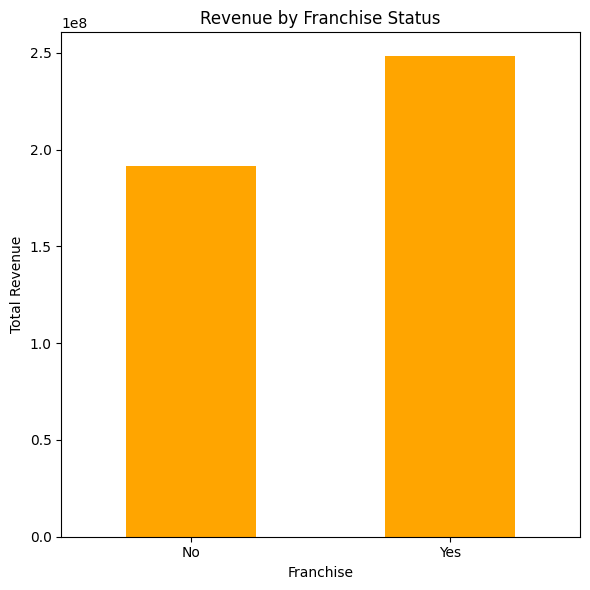

In [41]:
#  Bar Chart – Revenue by Franchise Status
plt.figure(figsize=(6, 6))
franchise_revenue = df.groupby("Franchise")["Revenue"].sum()
franchise_revenue.plot(kind='bar', color='orange')
plt.title("Revenue by Franchise Status")
plt.xlabel("Franchise")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

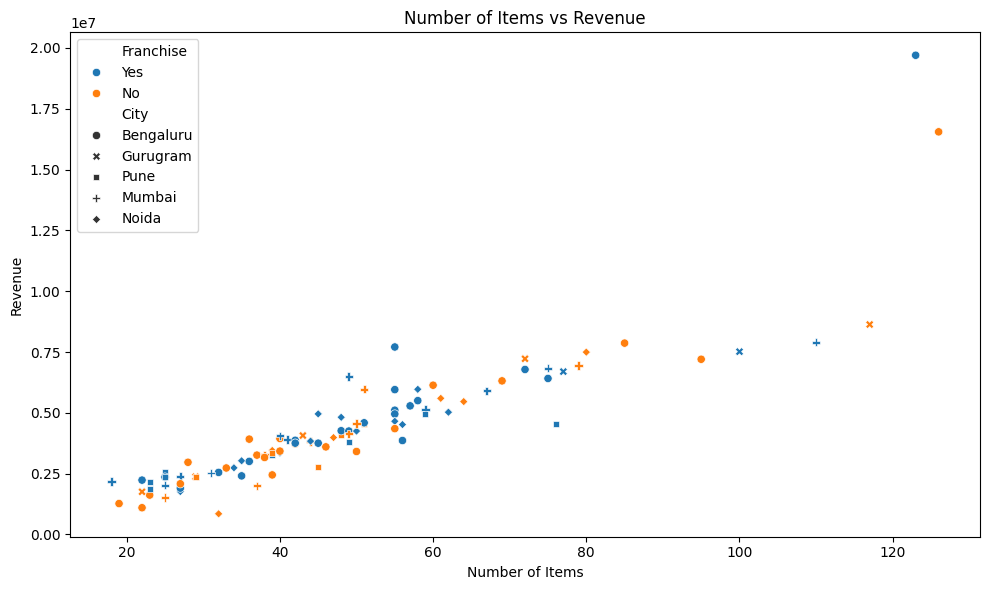

In [42]:
# Scatter Plot – Number of Items vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x="No_Of_Item", y="Revenue", hue="Franchise", style="City", data=df)
plt.title("Number of Items vs Revenue")
plt.xlabel("Number of Items")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


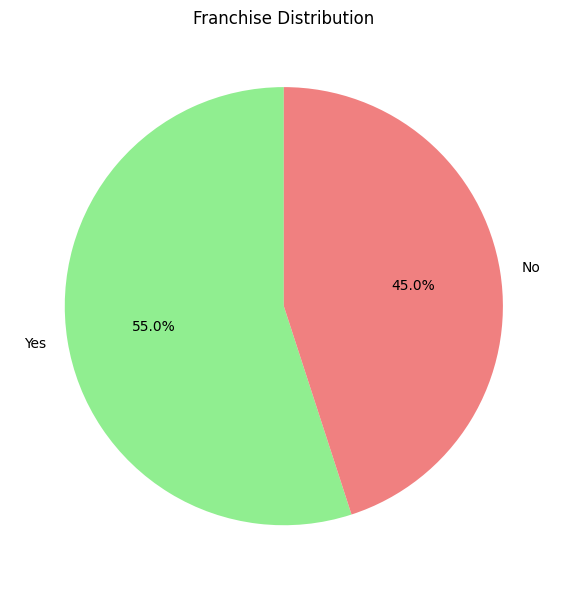

In [43]:
# Pie Chart – Franchise Distribution
plt.figure(figsize=(6, 6))
franchise_counts = df["Franchise"].value_counts()
plt.pie(franchise_counts, labels=franchise_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightgreen", "lightcoral"])
plt.title("Franchise Distribution")
plt.tight_layout()
plt.show()

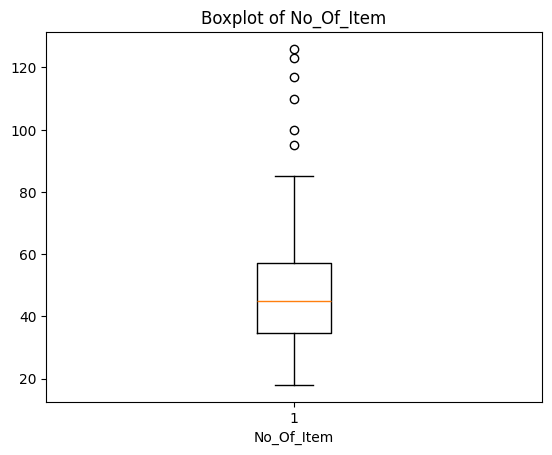

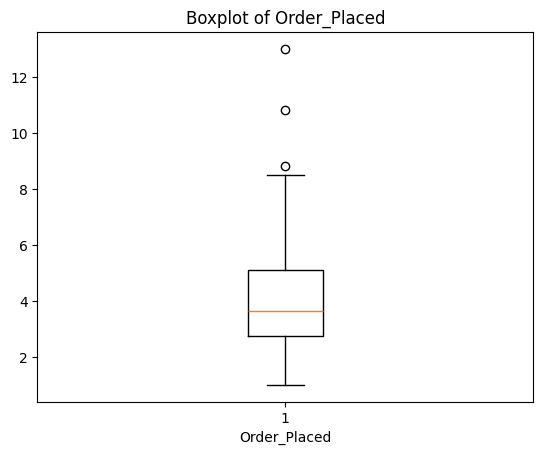

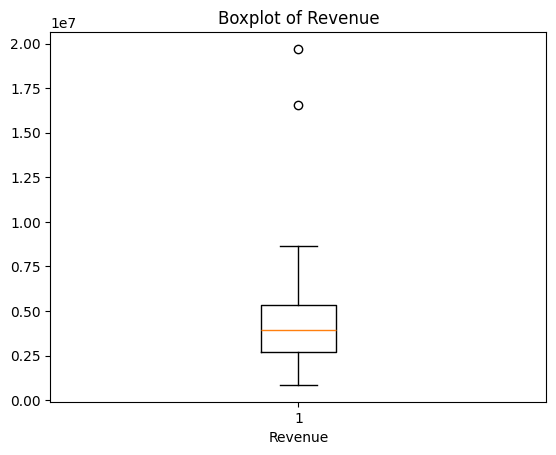

In [44]:
# Create boxplots for numerical columns
numerical_cols = ['No_Of_Item', 'Order_Placed', 'Revenue']
for col in numerical_cols:
  plt.boxplot(df[col])
  plt.xlabel(col)
  plt.title(f'Boxplot of {col}')
  plt.show()

# Correlation Matrix

In [45]:
# correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                    Id  No_Of_Item  Order_Placed   Revenue
Id            1.000000   -0.055173     -0.061160 -0.069456
No_Of_Item   -0.055173    1.000000      0.973335  0.892194
Order_Placed -0.061160    0.973335      1.000000  0.929407
Revenue      -0.069456    0.892194      0.929407  1.000000


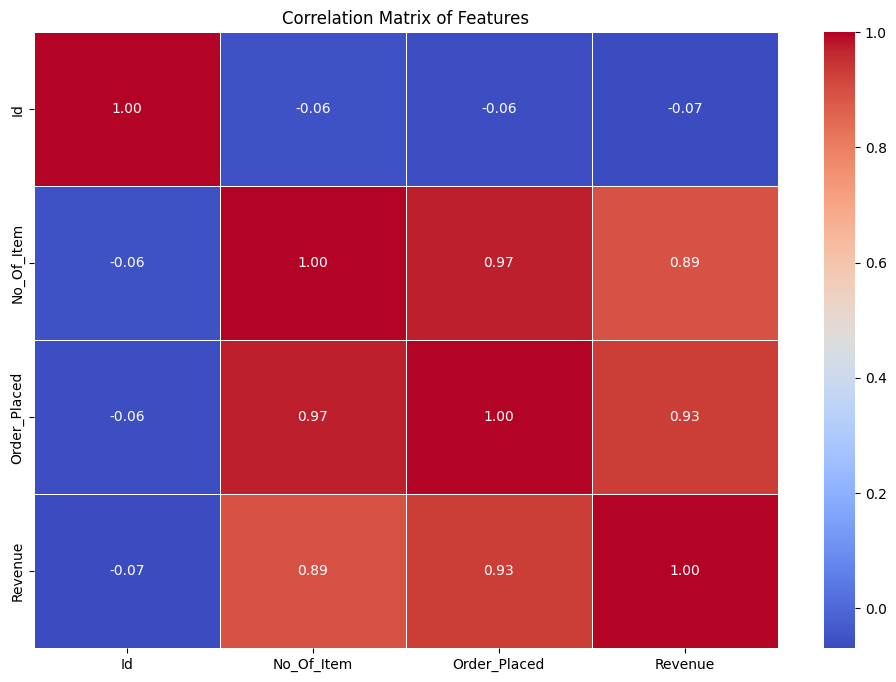

In [46]:
# Display correlation matrix
plt.figure(figsize=(12, 8))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Linear regression

In [84]:
# Import neccessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
df = pd.read_csv("revenue_prediction.csv")

In [88]:
# Encode categorical columns
categorical_cols = ['Name', 'Franchise', 'Category', 'City']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [89]:
# Drop ID column (not useful for prediction)
df = df.drop(['Id'], axis=1)

In [90]:
# Define features and target
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [91]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred

array([6639328.24002248, 5618312.41543147, 3829823.50107405,
       4149225.09270047, 4353765.08573592, 3797519.22873088,
       3924871.26416003, 3489530.66294757, 4050833.91957939,
       6540135.03910335, 5466147.75449918, 3100101.1093192 ,
       2810229.11888526, 2247753.86537866, 3558196.45550953,
       4541290.82274729, 5106070.41420127, 1441502.4408078 ,
       1743856.4917709 , 2187091.83637047])

In [96]:
# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 201203303659.80
R-squared: 0.86


# Logistic Regression

In [48]:
# import neccessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [49]:
# Create a binary target: 1 if revenue > median, else 0
df['High_Revenue'] = (df['Revenue'] > df['Revenue'].median()).astype(int)

In [50]:
# Drop original Revenue column
df = df.drop('Revenue', axis=1)

In [52]:
# import label enconder
from sklearn.preprocessing import LabelEncoder

In [53]:
# Encode categorical features
categorical_cols = ['Name', 'Franchise', 'Category', 'City']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [54]:
# Define features and target
X = df.drop(['Id', 'High_Revenue'], axis=1)
y = df['High_Revenue']


In [55]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Build and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [57]:
# Predict on test set
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [59]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10,  0],
       [ 3,  7]])

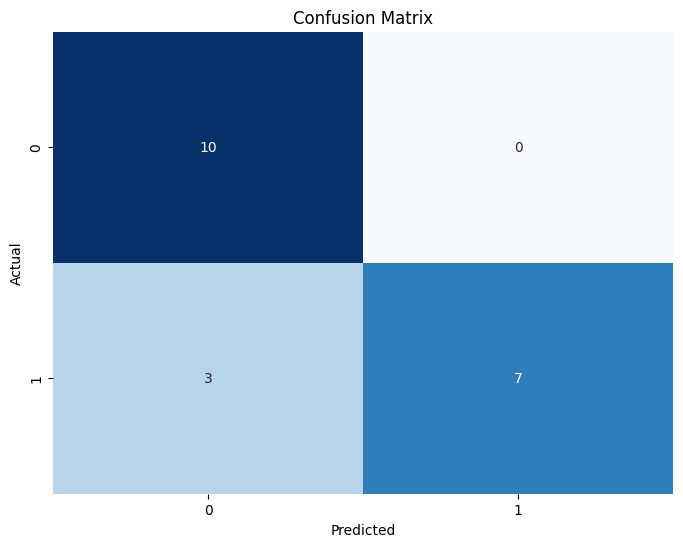

In [60]:
# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



In [64]:
# accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


# Decision Tree Classifier

In [65]:
# Import neccessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

In [71]:
# Create a binary target column: High Revenue (1) or Low Revenue (0)
df = pd.read_csv("revenue_prediction.csv")
df['High_Revenue'] = (df['Revenue'] > df['Revenue'].median()).astype(int)

In [72]:
# Drop original Revenue and ID columns
df = df.drop(['Revenue', 'Id'], axis=1)

In [73]:
# Encode categorical columns
label_cols = ['Name', 'Franchise', 'Category', 'City']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [74]:
# Define features (X) and target (y)
X = df.drop('High_Revenue', axis=1)
y = df['High_Revenue']

In [75]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Train Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [78]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [81]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[8, 2],
       [1, 9]])

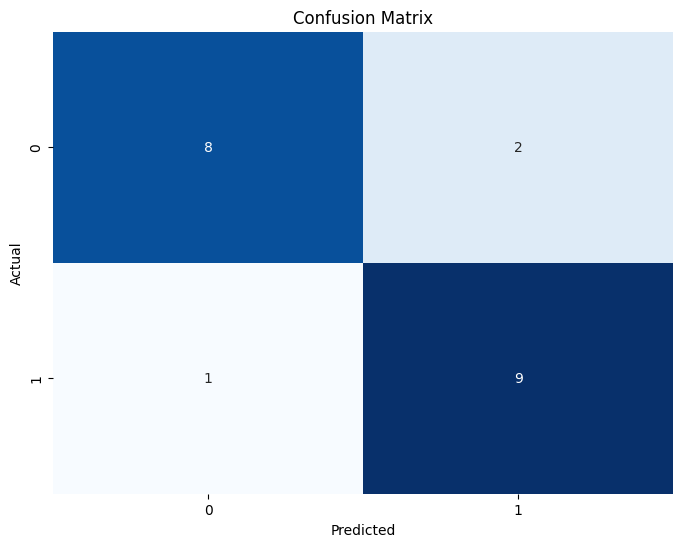

In [82]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [79]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



In [80]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.85


# Predict which model is the best

# Random Forest Classifier

In [102]:
# Import neccessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


In [103]:
# Reload the dataset to ensure correct data types and columns
df = pd.read_csv('revenue_prediction.csv')

In [104]:
# Create a binary target column: High Revenue (1) or Low Revenue (0)
df['High_Revenue'] = (df['Revenue'] > df['Revenue'].median()).astype(int)

In [105]:
# Drop original Revenue and ID columns
df = df.drop(['Revenue', 'Id'], axis=1)

In [106]:
# Encode categorical columns
label_cols = ['Name', 'Franchise', 'Category', 'City']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [107]:
# Define features (X) and target (y)
X = df.drop('High_Revenue', axis=1)
y = df['High_Revenue']

In [108]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Train Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [110]:
# Make predictions
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [113]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[10,  0],
       [ 1,  9]])

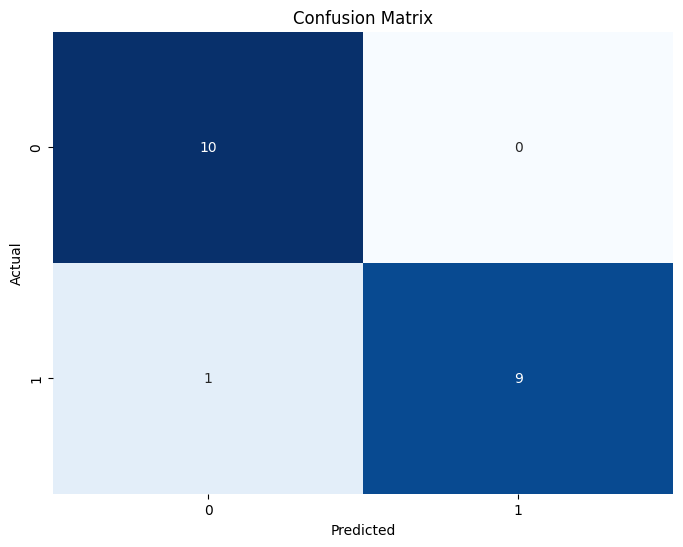

In [114]:
# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [115]:
# Accuracy
acc = accuracy_score(y_test, y_pred_rf)
acc

0.95

# Predict best model

In [116]:
# Predict which model is best
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy, accuracy_dt, acc]
best_model_index = accuracies.index(max(accuracies))
best_model = models[best_model_index]
print("✅ Best Performing Model:", best_model)

✅ Best Performing Model: Random Forest
